In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import datetime

In [8]:
columns = ['account_id', 'name', 'point', 'call_count', 'total_call_time', 
           'total_exclusive_time', 'min_call_time', 'ax_call_time', 'sum_of_squares', 
           'instances', 'language', 'app_name', 'app_id', 'scope', 'host', 
           'display_host', 'pid', 'agent_version', 'labels']

In [49]:
df = pd.read_csv('../data/raw/metrics_collector.tsv', nrows=1000000, names=columns, sep='\t', header=None, parse_dates=['point'])
print(df.shape)
df.head()


/tmp/ipykernel_8210/2076245847.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/metrics_collector.tsv', nrows=1000000, names=columns, sep='\t', header=None, parse_dates=['point'])


(1000000, 19)


account_id                                   name               point  \
0           1  AgentCheck/CircuitBreaker/tripped/all 2024-04-15 23:32:00   
1           1  AgentCheck/CircuitBreaker/tripped/all 2024-04-15 23:33:00   
2           1  AgentCheck/CircuitBreaker/tripped/all 2024-04-15 23:34:00   
3           1  AgentCheck/CircuitBreaker/tripped/all 2024-04-15 23:35:00   
4           1  AgentCheck/CircuitBreaker/tripped/all 2024-04-15 23:36:00   

   call_count  total_call_time  total_exclusive_time  min_call_time  \
0         0.0              0.0                   0.0            0.0   
1         0.0              0.0                   0.0            0.0   
2         0.0              0.0                   0.0            0.0   
3         0.0              0.0                   0.0            0.0   
4         0.0              0.0                   0.0            0.0   

   ax_call_time  sum_of_squares  instances language            app_name  \
0           0.0             0.0        1.0     java  [GMonit] Collector   
1           0.0             0.0        1.0     java  [GMonit] Collector   
2           0.0             0.0        1.0     java  [GMonit] Collector   
3           0.0             0.0        1.0     java  [GMonit] Collector   
4           0.0             0.0        1.0     java  [GMonit] Collector   

           app_id scope          host  display_host  pid agent_version labels  
0  17592186045423   NaN  575f5ba20b4b  575f5ba20b4b    1         8.5.0     {}  
1  17592186045423   NaN  575f5ba20b4b  575f5ba20b4b    1         8.5.0     {}  
2  17592186045423   NaN  575f5ba20b4b  575f5ba20b4b    1         8.5.0     {}  
3  17592186045423   NaN  575f5ba20b4b  575f5ba20b4b    1         8.5.0     {}  
4  17592186045423   NaN  575f5ba20b4b  575f5ba20b4b    1         8.5.0     {}

In [54]:
for col in df.columns:
    print(col, df[col].nunique())

account_id 1
name 52
point 38955
call_count 10196
total_call_time 607676
total_exclusive_time 607618
min_call_time 167383
ax_call_time 326646
sum_of_squares 640402
instances 6
language 1
app_name 1
app_id 1
scope 24
host 1
display_host 1
pid 1
agent_version 1
labels 1


In [55]:
df['scope'].value_counts()

scope
WebTransaction/Handler/apm/method/span_event_data                      287696
WebTransaction/Handler/browser/events/1/:license-key                    34939
WebTransaction/Handler/apm/method/metric_data                           26681
WebTransaction/Handler/apm/method/analytic_event_data                   26681
WebTransaction/Handler/browser/jserrors/1/:license-key                  26680
WebTransaction/Handler/browser/1/:license-key                           26679
WebTransaction/Handler/browser/resources/1/:license-key                 26679
WebTransaction/Handler/infra/infra-api/infra/v2/metrics/events/bulk     26679
WebTransaction/Handler/apm/method/error_data                            25189
WebTransaction/Handler/apm/method/transaction_sample_data               24320
WebTransaction/Handler/apm/method/get_agent_commands                     4337
WebTransaction/Handler/infra/command-api/agent_commands/v1/commands      4336
WebTransaction/NormalizedUri/404/*                        

In [50]:
df['point'].min(), df['point'].max()

(Timestamp('2024-04-15 23:32:00'), Timestamp('2024-05-13 00:58:00'))

In [51]:
df['app_name'].value_counts()

app_name
[GMonit] Collector    1000000
Name: count, dtype: int64

In [52]:
df['account_id'].value_counts()

account_id
1    1000000
Name: count, dtype: int64

In [53]:
df['name'].value_counts()

name
External/rc1b-avv1vj4b6sdf8umr.mdb.yandexcloud.net/HttpURLConnection/getOutputStream    221404
Java/javax.servlet.ServletRequestListener/requestInitialized                             69604
Datastore/operation/Redis/setex                                                          49522
Datastore/operation/Redis/append                                                         49522
Datastore/operation/Redis/expire                                                         49522
Datastore/operation/Redis/get                                                            49522
Datastore/operation/Redis/getdel                                                         49522
Datastore/operation/Redis/set                                                            49522
Datastore/Redis/all                                                                      32117
Datastore/Redis/allWeb                                                                   25064
Datastore/all                                

In [32]:
start_date = datetime.datetime.strptime('2024-04-19',"%Y-%m-%d")
end_date = datetime.datetime.strptime('2024-04-20',"%Y-%m-%d")

In [42]:
df['name'].nunique()

12

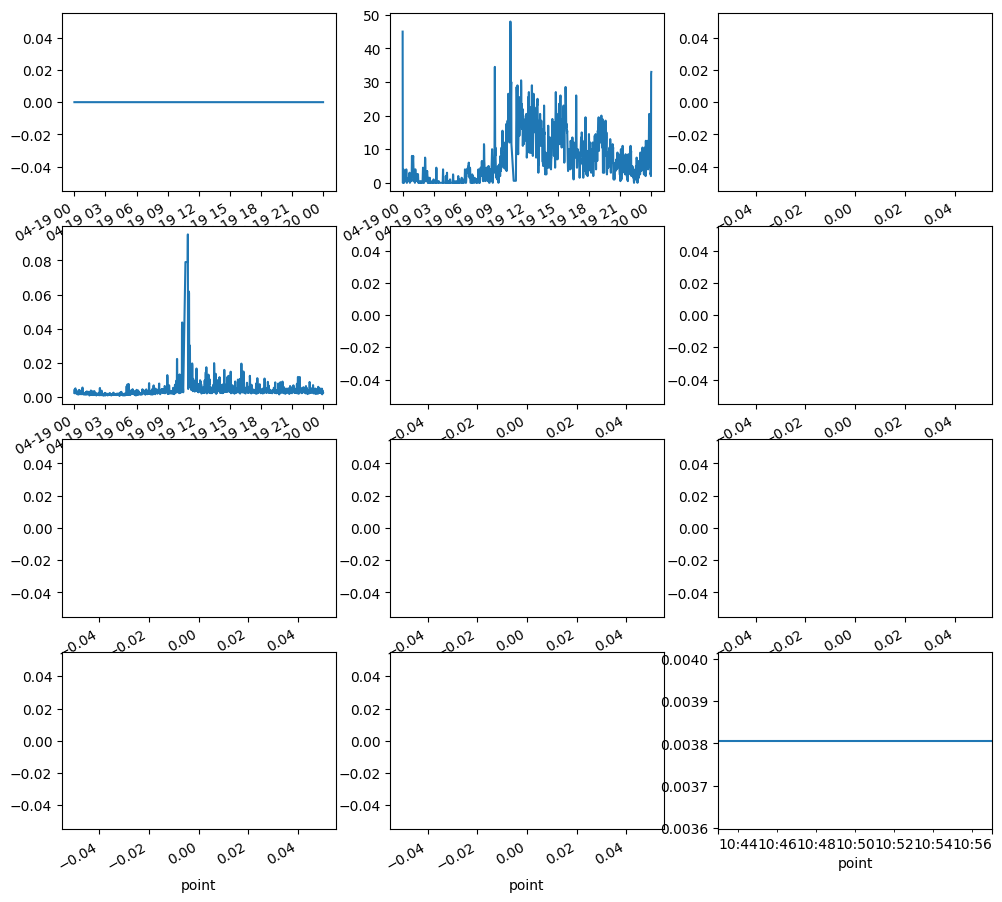

In [48]:
fig, ax = plt.subplots(4,3, figsize=(12,12))
ax = ax.reshape(-1)
for i, name in enumerate(df['name'].unique()):
    df_sub = df.query('name == @name and point >= @start_date and point <= @end_date')
    df_sub.groupby('point')['total_call_time'].sum().plot(ax=ax[i])
 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

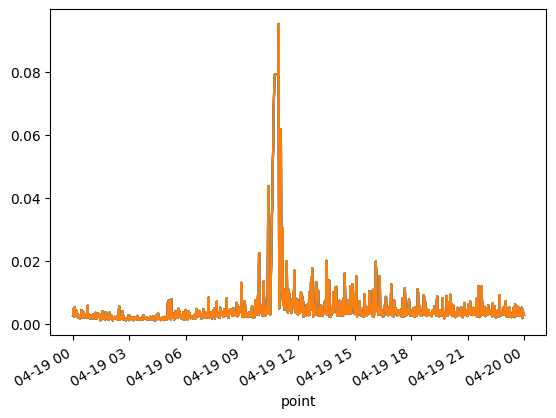

In [41]:
for name in df['name'].unique():
    plot_by_name(name)
